# Problem statement

### Prepare a prediction model for profit of 50_startups data.

Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

##  Importing Libraries

In [1]:
# Importing Libararies.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_style('Darkgrid')
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot


import warnings
warnings.filterwarnings("ignore")

## EDA

In [2]:
data=pd.read_csv('50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape   # data has 5 catergories and 50 entries each.

(50, 5)

In [5]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
data.info()   # cheking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.isnull().sum()   # checking for null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
data.describe().T # statistical description of the data.

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [9]:
data[data.values==0.0]

,R&D Spend,Administration,Marketing Spend,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [10]:
data=data.drop(49)  # row value 19,47,48,49 dropped

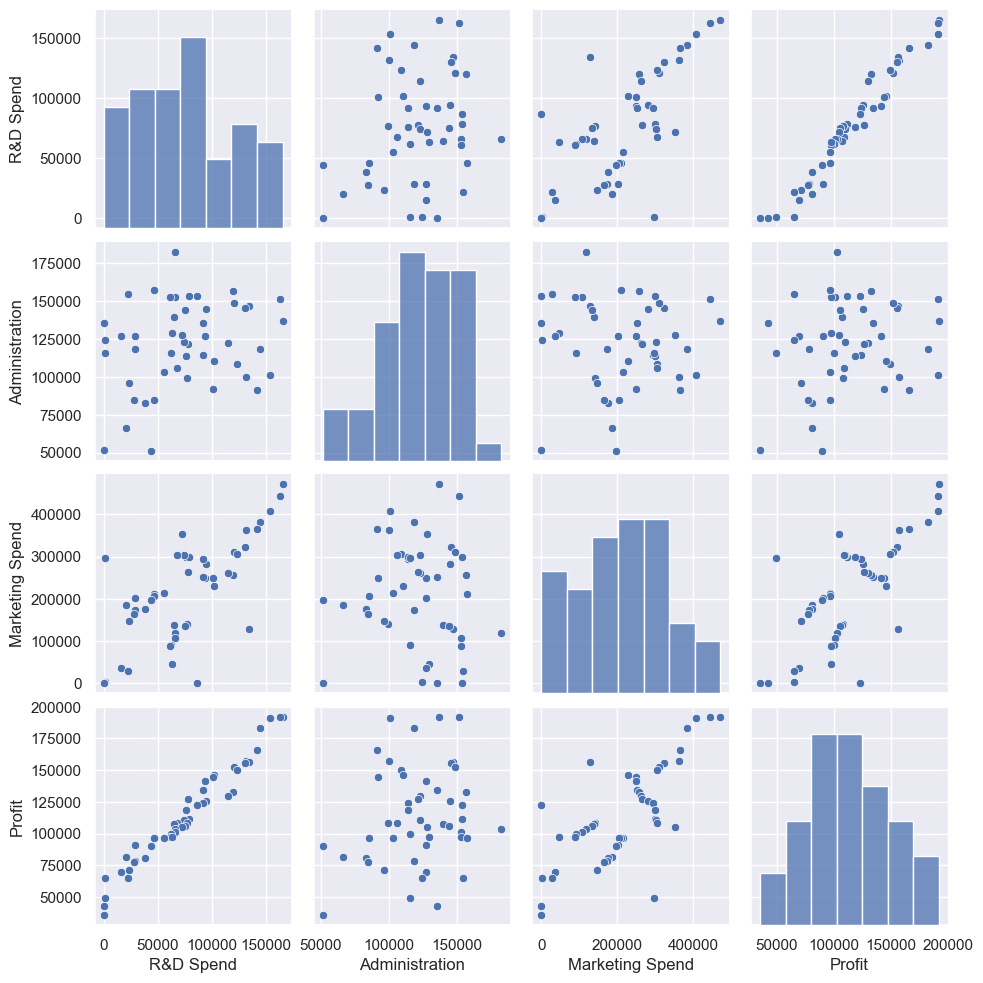

In [11]:
sns.pairplot(data)

<Axes: >

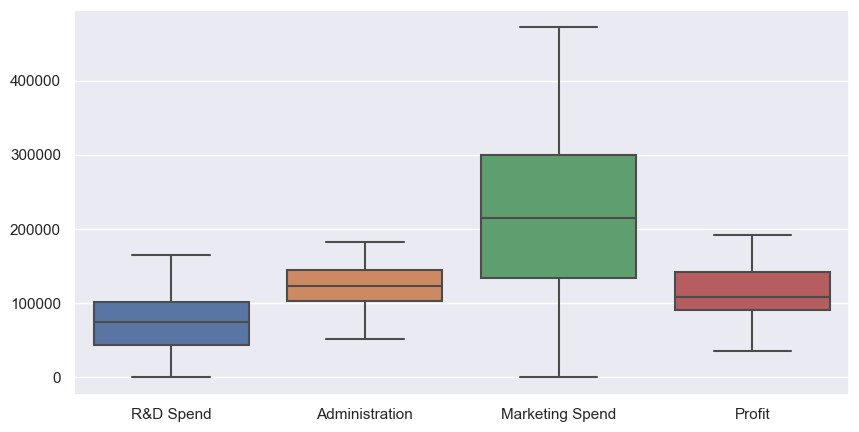

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data)

#  There seems to be some outliers in profit column of the data.

<Axes: xlabel='State', ylabel='count'>

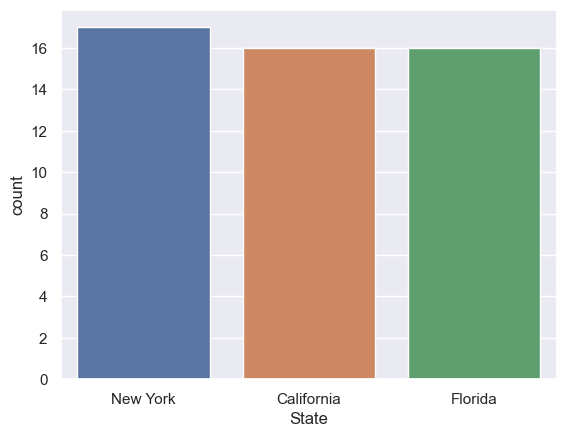

In [14]:
sns.countplot(data,x='State')

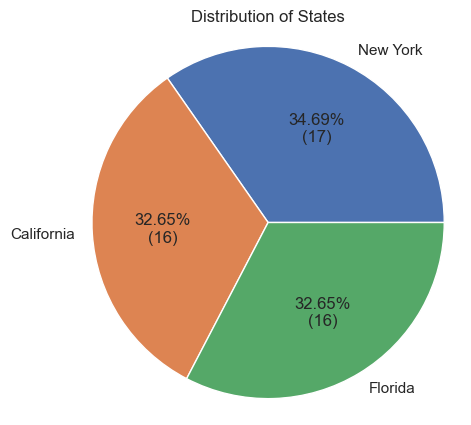

In [16]:
plt.figure(figsize=(5,5))
data['State'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p, (p/100)*(data['State'].value_counts().sum())))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of States')
plt.ylabel('')  # Remove the label for y-axis
plt.show()

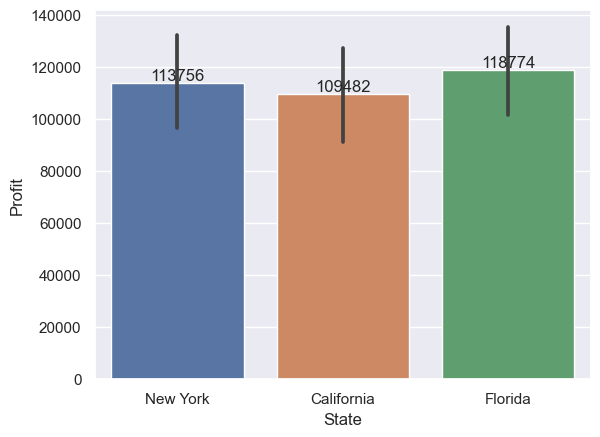

In [18]:
ax=sns.barplot(data,x='State',y='Profit')
for i in ax.containers:
    ax.bar_label(i,)
    

In [19]:
# As we saw in above observation the value counts of categorical data is almost similar 
# There is not much deiffrence in profit value of State category.

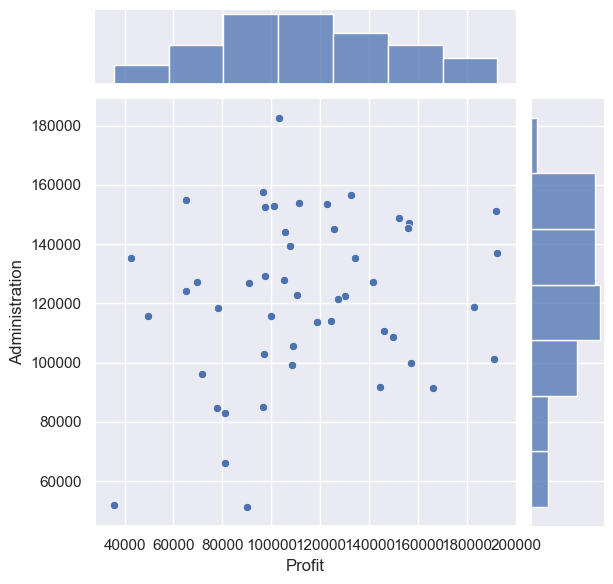

In [20]:
sns.jointplot(data,x='Profit',y='Administration')

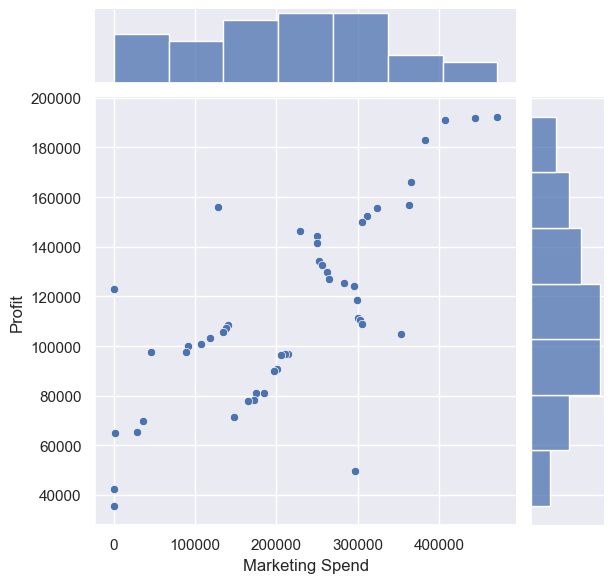

In [21]:
sns.jointplot(data,y='Profit',x='Marketing Spend') 

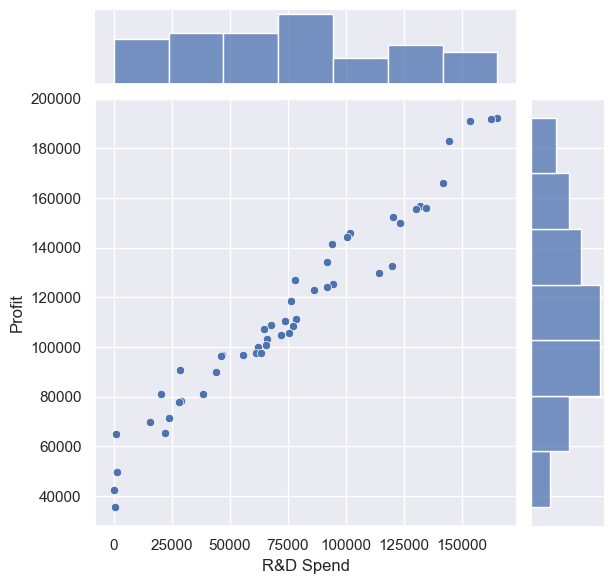

In [22]:
sns.jointplot(data,y='Profit',x='R&D Spend') 

### Dealings with outliers

In [26]:
data1=data   # making a copy of data just in case

In [27]:
data1=data1.drop("State",axis=1)   

In [28]:
data1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [29]:
data1[data1.values==0.0]    # null values

,R&D Spend,Administration,Marketing Spend,Profit
19,86419.70,153514.11,0.0,122776.86
47,0.00,135426.92,0.0,42559.73
47,0.00,135426.92,0.0,42559.73
48,542.05,51743.15,0.0,35673.41


In [30]:
# df1_50s = df_50s[~((df_50s < (Q1 - 1.5 * IQR)) | (df_50s > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1=data1.quantile(0.25) 

In [31]:
Q3=data1.quantile(0.75)

In [32]:
IQR=Q3-Q1

In [33]:
var1=Q1-1.5*IQR     # upper bound

In [34]:
var2=Q3+1.*IQR      # lower bound

In [37]:
data2=data1[~((data1 <var1)| (data1>var2)).any(axis=1)]

In [38]:
data2.shape  # getting rid of outliers

(47, 4)

In [39]:
data2[data2.values==0.0]

,R&D Spend,Administration,Marketing Spend,Profit
19,86419.70,153514.11,0.0,122776.86
47,0.00,135426.92,0.0,42559.73
47,0.00,135426.92,0.0,42559.73
48,542.05,51743.15,0.0,35673.41


In [40]:
data2.tail()

,R&D Spend,Administration,Marketing Spend,Profit
44,22177.74,154806.14,28334.72,65200.33
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41


In [41]:
#Renaming the columns
data2=data2.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"Profit":'profit'},axis=1)
data2.head()

,RnD,admin,marketing,profit
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51


In [42]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
RnD,47.0,71449.657021,42033.058095,0.00,41314.230,72107.60,97664.560,153441.51
admin,47.0,120467.506170,28462.717948,51283.14,102101.520,122616.84,144606.780,182645.56
marketing,47.0,204051.046809,112363.244075,0.00,130883.445,210797.67,297889.465,407934.54
profit,47.0,110678.652553,35276.277381,35673.41,90328.665,107404.34,133455.000,191050.39


<Axes: >

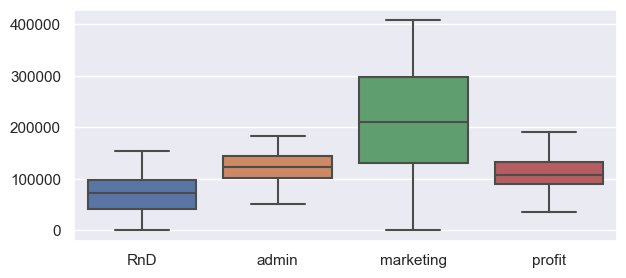

In [43]:
plt.figure(figsize=(7,3))    #  No Outliers in profit column now.
sns.boxplot(data2)

### Correlation matrics

In [44]:
data2.corr()               # Strong Correlation with RnD and marketing.

,RnD,admin,marketing,profit
RnD,1.000000,0.195119,0.651985,0.974072
admin,0.195119,1.000000,-0.118672,0.151193
marketing,0.651985,-0.118672,1.000000,0.682922
profit,0.974072,0.151193,0.682922,1.000000


In [45]:
##Checking null values:-
data2.isnull().sum()

RnD          0
admin        0
marketing    0
profit       0
dtype: int64

In [46]:
data2[data2.duplicated()].shape   # no duplicated entries. 

(0, 4)

<Axes: >

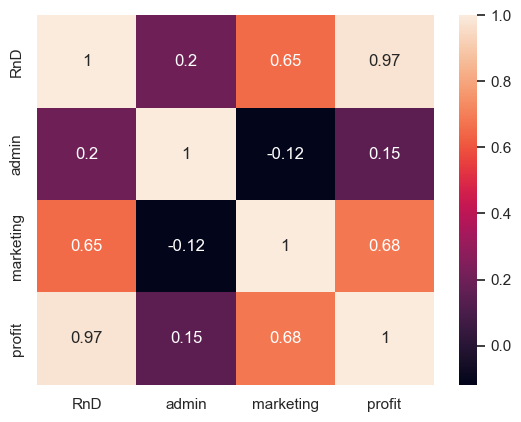

In [47]:
sns.heatmap(data2.corr(),annot=True)

## Model Building

In [48]:
model=smf.ols("profit~RnD+admin+marketing",data=data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     291.9
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.34e-28
Time:                        15:12:45   Log-Likelihood:                -486.37
No. Observations:                  47   AIC:                             980.7
Df Residuals:                      43   BIC:                             988.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.338e+04   5861.396      9.107      0.000    4.16e+04    6.52e+04
RnD            0.7805      0.039     19.924      0.000       0.702       0.860
admin         -0.0266      0.044     -0.603      0.550      -0.116       0.062
marketing      0.0232      0.014      1.606      0.116      -0.006       0.052
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.251
Skew:                          -0.043   Prob(JB):                        0.882
Kurtosis:                       2.653   Cond. No.                     1.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
model.predict()

array([179926.35643057, 171806.39875212, 170369.03225569, 162083.02402775,
       157493.93878507, 158727.57013545, 150743.37559545, 153834.77092715,
       135301.88969436, 135312.21962449, 129054.60434028, 127442.01470819,
       148786.63036036, 145582.33291339, 117172.65366339, 129961.85058722,
       128801.83355916, 116740.64925116, 116802.95814701, 117432.22366744,
       114910.37142791, 110353.90282542, 114133.92008836, 103338.8808239 ,
       111449.33649238, 114461.17458487, 102813.43680257, 102997.89722788,
       100803.03008341,  99078.82591746, 100498.53002176,  98934.70302908,
        90313.30371898,  91803.22806922,  77040.7576942 ,  90987.59247306,
        71716.26115941,  85329.90675536,  76679.59941624,  76714.66698619,
        72707.58363089,  62913.71400782,  67223.74478777,  50896.5235969 ,
        58225.42288874,  49771.42119032,  52422.60687422])

## Calculating VIF(varience inflation factor) values

In [50]:
# VIF helps identify the degree of multicollinearity among the independent variables.

In [51]:
rqs_rs = smf.ols("RnD~admin+marketing",data=data2).fit().rsquared
vif_rs = 1/(1-rqs_rs)

In [52]:
rqs_ad = smf.ols("admin~RnD+marketing",data=data2).fit().rsquared
vif_ad = 1/(1-rqs_ad)

In [53]:
rqs_ms = smf.ols("marketing~RnD+admin",data=data2).fit().rsquared
vif_ms = 1/(1-rqs_ms)

In [54]:
col = {'Variance':["RnD","admin","marketing"],
      'VIF':[vif_rs,vif_ad,vif_ms]}

In [55]:
vif_frame=pd.DataFrame(col)
vif_frame.style.hide_index()

Variance,VIF
RnD,2.001590
admin,1.167182
marketing,1.952889


### Test for Normality of Residuals

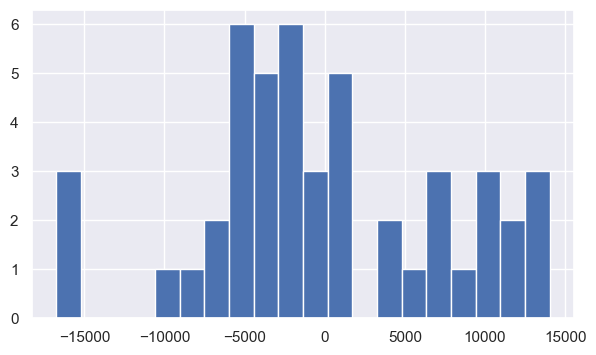

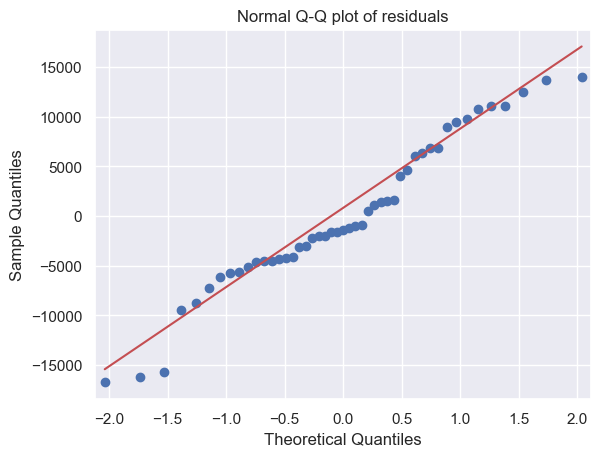

In [56]:
plt.figure(figsize=(7,4))
plt.hist(model.resid,bins=20)
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Residual plot for homoscedasticity


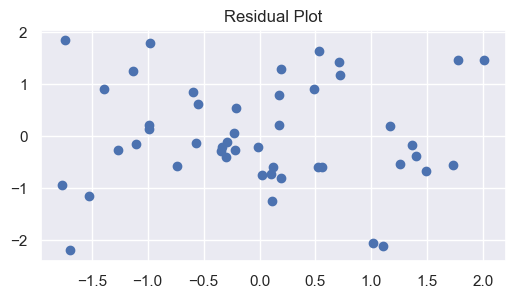

In [57]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()
plt.figure(figsize=(6,3))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.show()

### Residual VS Regressors

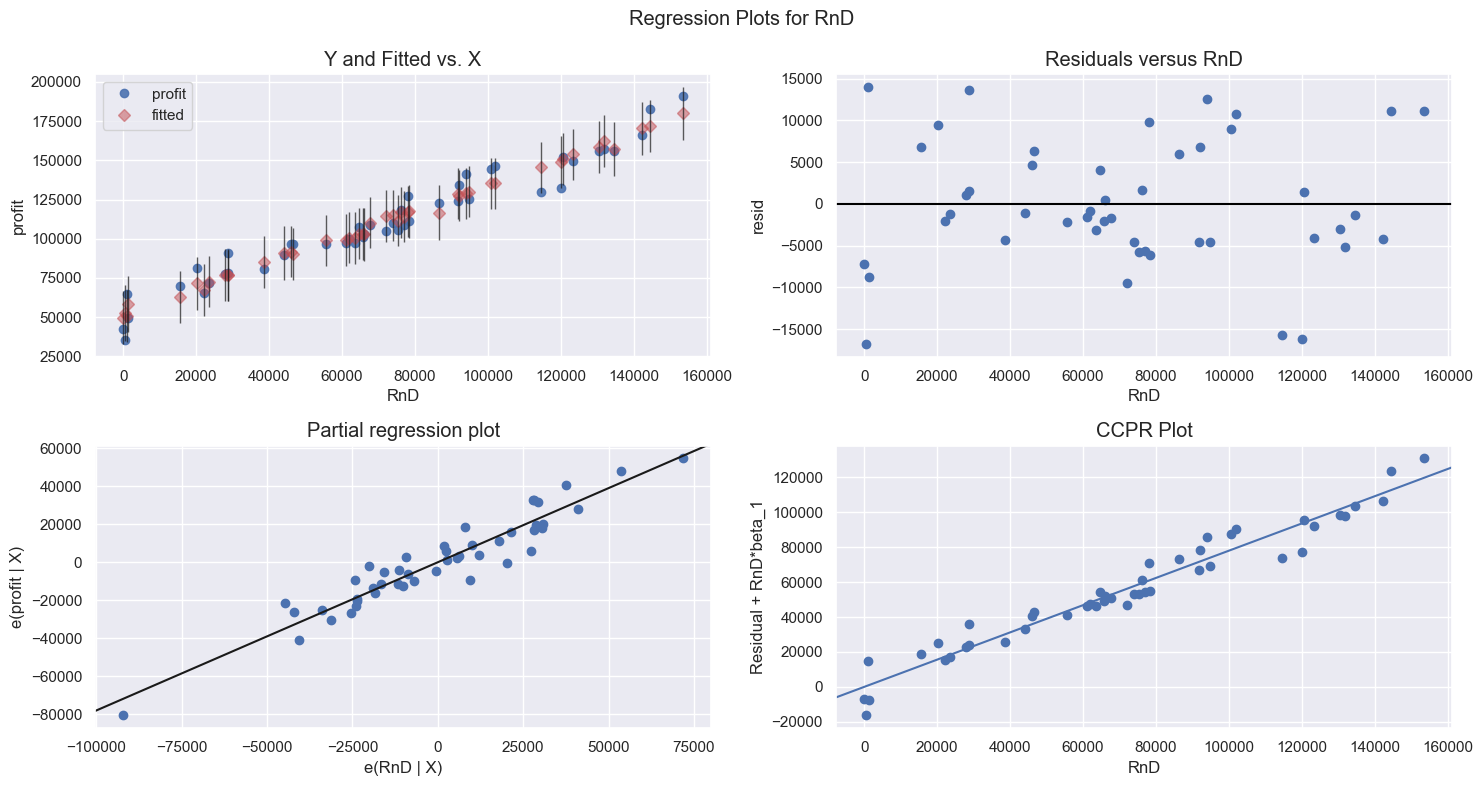

In [58]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RnD',fig=fig)
plt.show()

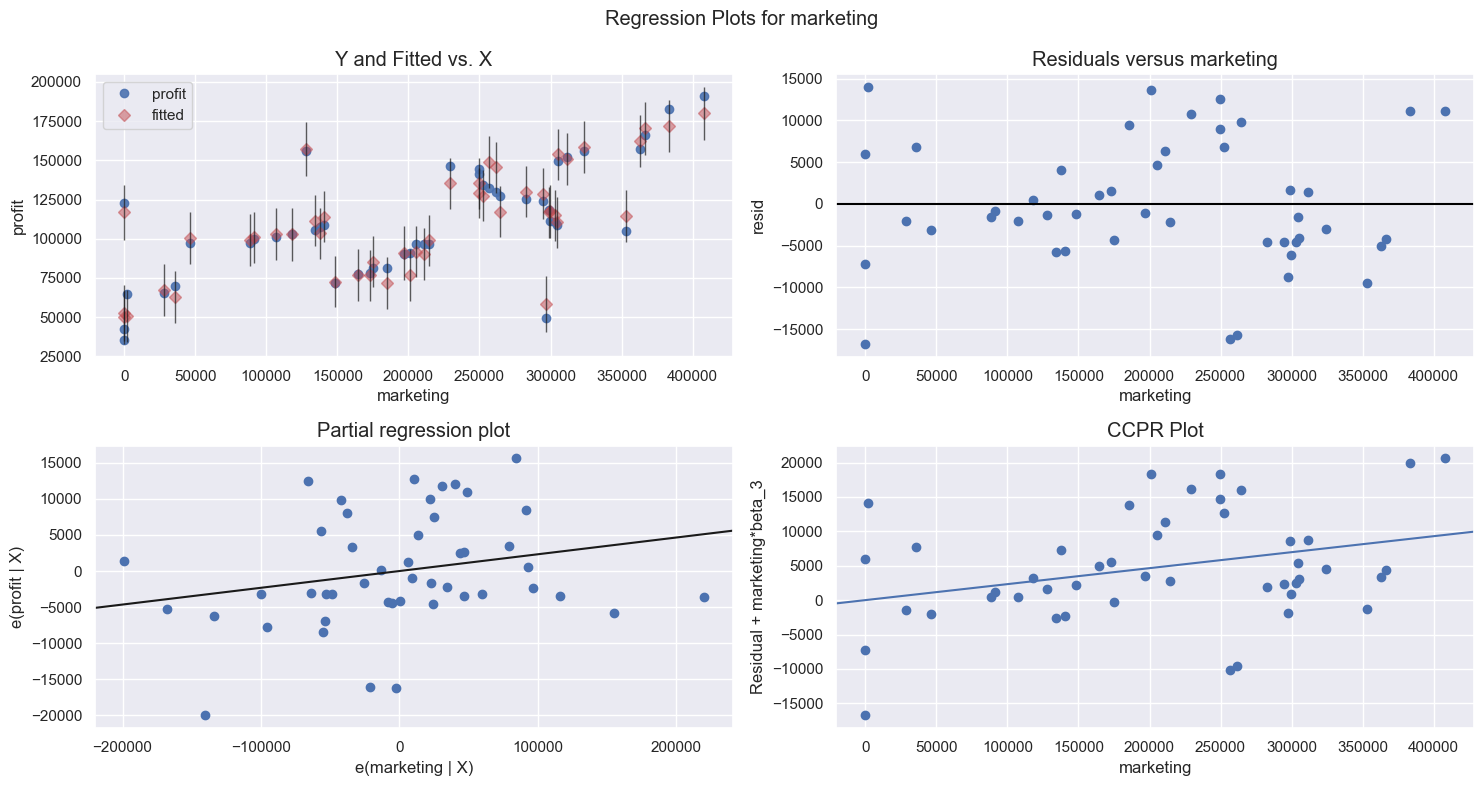

In [59]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'marketing',fig=fig)
plt.show()

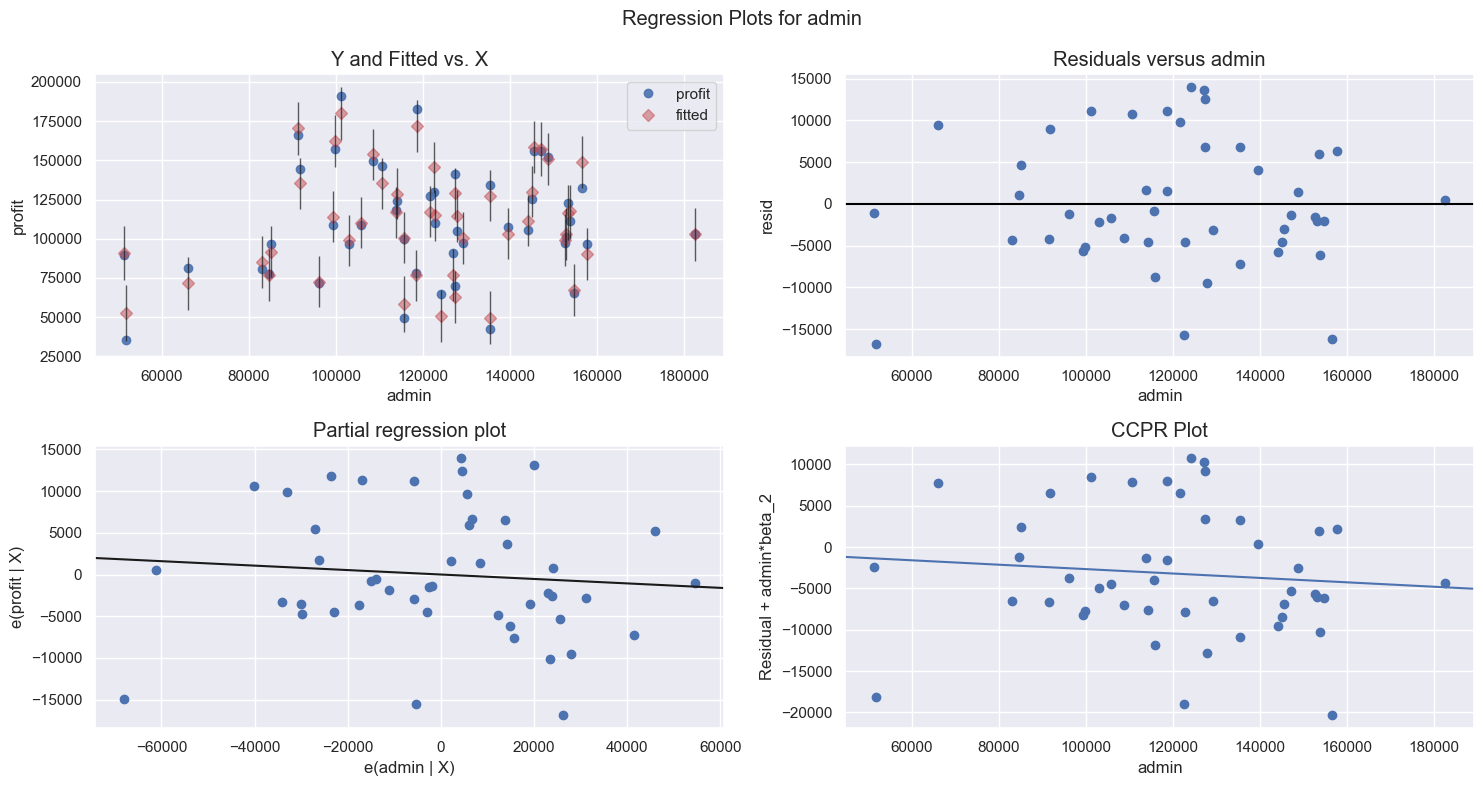

In [60]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'admin',fig=fig)
plt.show()

### Cook's Distance

In [61]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
k=3
n=50
3*(k+1)/n

0.24

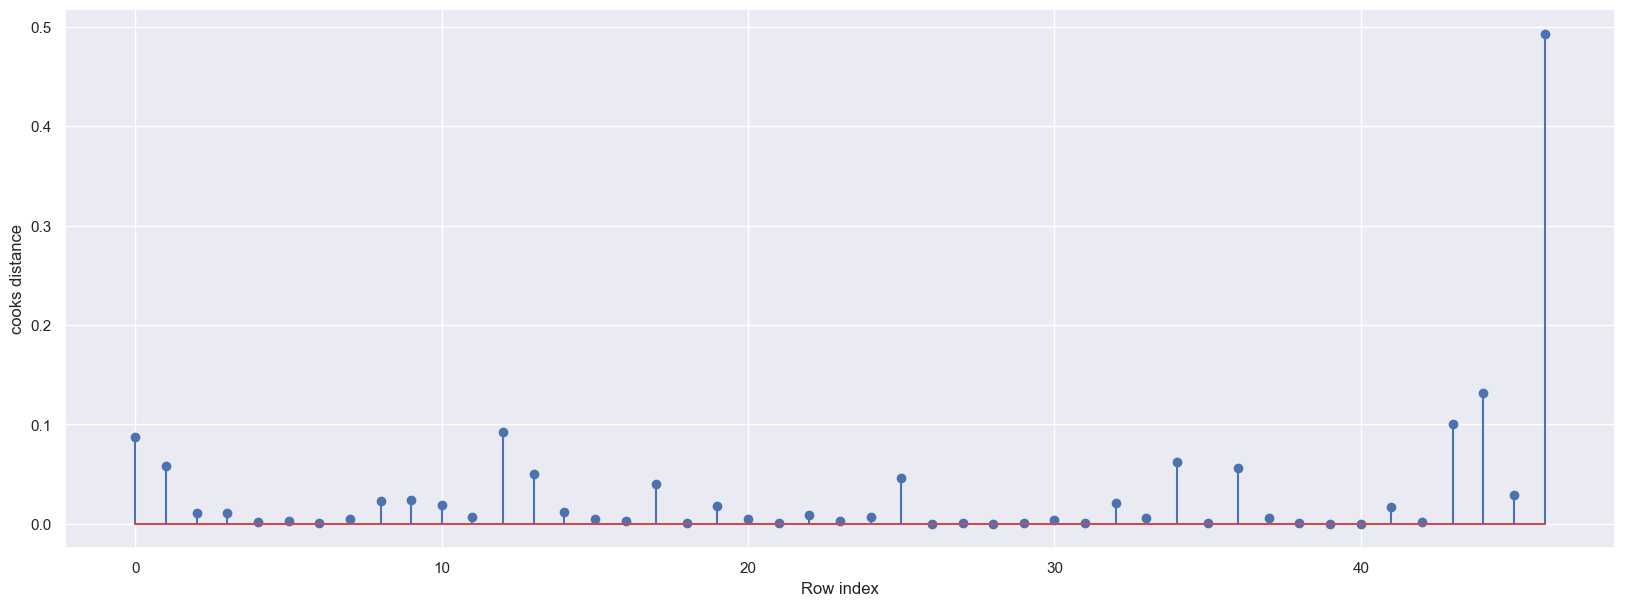

In [62]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [63]:
np.where(c>0.24)

(array([46], dtype=int64),)

In [64]:
data2 = data2.drop(data2.index[45],axis=0).reset_index()

In [65]:
final_model=smf.ols('profit~RnD+admin+marketing',data=data2).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     266.5
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           2.37e-27
Time:                        15:12:58   Log-Likelihood:                -476.01
No. Observations:                  46   AIC:                             960.0
Df Residuals:                      42   BIC:                             967.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.373e+04   5877.180      9.143      0.000    4.19e+04    6.56e+04
RnD            0.7755      0.040     19.608      0.000       0.696       0.855
admin         -0.0226      0.044     -0.509      0.613      -0.112       0.067
marketing      0.0217      0.015      1.493      0.143      -0.008       0.051
==============================================================================
Omnibus:                        0.067   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.210
Skew:                          -0.079   Prob(JB):                        0.900
Kurtosis:                       2.709   Cond. No.                     1.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
final_model.rsquared,final_model.aic

(0.9500803309918413, 960.01663418279)

In [88]:
final_model.predict(data2)

0     179302.071322
1     171335.227866
2     169825.416784
3     161629.803690
4     157568.953824
5     158523.997934
6     150620.223315
7     153546.897637
8     135243.411263
9     135153.794562
10    129072.886368
11    127498.295795
12    148780.393804
13    145459.537328
14    117226.324668
15    129998.313846
16    128710.593488
17    117275.630272
18    116783.135210
19    117560.019463
20    114930.738185
21    110336.444815
22    114288.321560
23    103721.194281
24    111802.022907
25    114436.788249
26    103391.200364
27    103475.657117
28    101173.069143
29     99606.162121
30    100983.315734
31     99102.200623
32     90751.420208
33     91960.041358
34     77460.217178
35     91031.549200
36     71957.042346
37     85561.787413
38     77106.897284
39     77023.111119
40     73108.188867
41     63648.871685
42     68045.945058
43     51742.347975
44     58594.221957
45     52983.254812
dtype: float64

In [95]:
predicted=pd.DataFrame()
predicted['RnD']=data2.RnD
predicted['marketing']=data2.marketing
predicted['administration']=data2.admin
predicted['Profit']=data2.profit

In [96]:
predicted['Predicted_Profit']=round(pd.DataFrame(final_model.predict()),2)

In [97]:
predicted[predicted.values==0.0]
predicted=predicted.drop(45)
predicted=predicted.drop(17)

In [98]:
predicted

,RnD,marketing,administration,Profit,Predicted_Profit
0,153441.51,407934.54,101145.55,191050.39,179302.07
1,144372.41,383199.62,118671.85,182901.99,171335.23
2,142107.34,366168.42,91391.77,166187.94,169825.42
3,131876.90,362861.36,99814.71,156991.12,161629.80
4,134615.46,127716.82,147198.87,156122.51,157568.95
5,130298.13,323876.68,145530.06,155752.60,158524.00
6,120542.52,311613.29,148718.95,152211.77,150620.22
7,123334.88,304981.62,108679.17,149759.96,153546.90
8,101913.08,229160.95,110594.11,146121.95,135243.41
9,100671.96,249744.55,91790.61,144259.40,135153.79


In [77]:
# ctrl+/ for multi comment



# predicted = pd.DataFrame()
# predicted['RnD'] = df4.RnD
# predicted['marketing'] = df4.marketing
# predicted['Profit'] = df4.profit
# predicted['Predicted_Profit'] = pd.DataFrame(final_model.predict(predicted[['RnD','marketing']]))
# predicted

In [35]:
#Outliers=data1.Profit[(data1.Profit<=var1) | (data1.Profit>= var2)]

In [36]:
# Outliers                 # we found the outliers

# 0     192261.83
# 1     191792.06
# 2     191050.39
# 49     14681.40

# Name: Profit, dtype: float64